In [13]:
# MOHAMED ABUSAIR
import numpy as np
import pandas as pd
import sklearn.model_selection 
from sklearn.model_selection import ShuffleSplit
import visuals as vs
%matplotlib inline
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Boston housing dataset has 489 data points with 4 variables each.
Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**


# answer1
when RM	Increase effect on MEDV Increase because More rooms → higher home prices (luxury).
when LSTAT Increase	effect on MEDV Decrease	becaues Higher poverty → lower home prices.
when PTRATIO Increase effect on MEDV  Decrease	becaues	Worse education quality → lower home prices.




**Hint:** This problem can phrased using examples like below.  
# QUESTION
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?


# answer 
A home with an 'RM' value (number of rooms) of 7 would likely be worth more than a home with an 'RM' value of 6.


# Question
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?



# answer 
A neighborhood with an 'LSTAT' value of 15% would likely have homes priced higher than a neighborhood with an 'LSTAT' value of 20%.

# Question
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?



# answer
A neighborhood with a 'PTRATIO' value of 10 would likely have home prices that are higher than a neighborhood with a 'PTRATIO' value of 15.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

## takecare for this part to focus for every stage

*****************************
**************************

*****************************
**************************

## R2 Score

### Implementation: Define a Performance Metric
- It is difficult to measure the quality of a given model without quantifying its performance over training and testing.
- This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement.
-  For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance.
-  The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 
******************************************


The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. 
************************************
A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. 

Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable.

******************************************
For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. 
************************************
A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. 

Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable.

******************************************
For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [2]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_test, y_predict):
    """ Calculates and returns the performance score between 
        test and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_test' and 'y_predict'
    score = r2_score(y_test, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [3]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

# answer
Yes, the model with an R² (coefficient of determination) of 0.923 can be considered to have successfully captured the variation of the target variable. Here's why:
The high R² score implies that this model is very good at predicting the target variable, making it a reliable tool for this dataset


### Implementation: Shuffle and Split Data
- Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets.
-  Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [4]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

#  Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=1)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

# answer
Splitting a dataset into training and testing subsets provides several essential benefits when building a learning algorithm:

Key Benefits:
Evaluating Model Performance:

The training subset is used to train the model by finding patterns or relationships in the data.

The testing subset is kept separate to evaluate how well the trained model generalizes to unseen data. This ensures you can measure the model's true performance.

Preventing Overfitting:

Overfitting occurs when the model memorizes the training data instead of learning general patterns, resulting in poor performance on new data.

By testing on a separate dataset (test subset), you can check if the model performs well on data it hasn't seen before, preventing overfitting.

Preventing Underfitting:

Underfitting happens when the model is too simple to capture the underlying patterns in the data.

Training and testing splits allow you to iterate on your model's complexity and determine if it's generalizing well or missing critical patterns.

Mimicking Real-World Usage:

In practice, a deployed machine learning model will operate on new, unseen data. By testing on a "hidden" test set, you simulate this real-world scenario and ensure your model is robust.

Ratio for Splitting:
A common practice is to split the data into 80% training and 20% testing, though this can vary depending on the dataset size and the problem.

### Implementation: Shuffle and Split Data
- Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets.
-  Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

In [5]:
import warnings
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import learning_curve, ShuffleSplit, train_test_split
from sklearn.tree import DecisionTreeRegressor

# Suppress matplotlib user warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

def ModelLearning(X, y):
    """Calculates the performance of several models with varying sizes of training data.
       The learning and testing scores for each model are then plotted."""
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0] * 0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig, axes = plt.subplots(2, 2, figsize=(10, 7))

    # Create four different models based on max_depth
    for k, depth in enumerate([1, 3, 6, 10]):
        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth=depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(
            regressor, X, y, cv=cv, train_sizes=train_sizes, scoring='r2'
        )
        
        # Find the mean and standard deviation for smoothing
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        # Subplot the learning curve 
        ax = axes[k//2, k%2]
        ax.plot(sizes, train_mean, 'o-', color='r', label='Training Score')
        ax.plot(sizes, test_mean, 'o-', color='g', label='Testing Score')
        ax.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='r')
        ax.fill_between(sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')
        
        # Labels
        ax.set_title(f'max_depth = {depth}')
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0] * 0.8])
        ax.set_ylim([-0.05, 1.05])
        ax.legend(loc='lower right')
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=16, y=1.03)
    fig.tight_layout()
    plt.show()



c:\python\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\python\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\python\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\python\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\python\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\python\Lib\site-packages\sklearn\metr

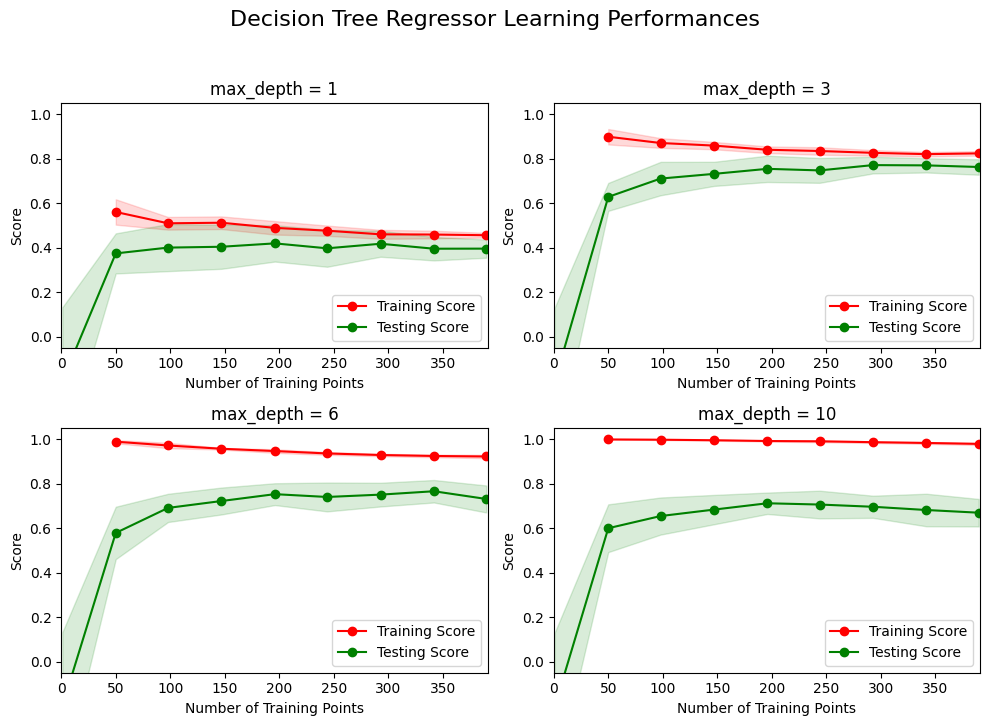

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

# answer


Maximum Depth for the Model: The maximum depth of the chosen graph is 6, as indicated in the graph's label.

Behavior of the Training and Testing Scores:

Training Curve: As more training points are added, the training score starts high and gradually decreases before stabilizing. This slight decline is expected, as the model has less opportunity to overfit with more data.

Testing Curve: Initially, the testing score increases sharply as the model sees more data and learns patterns better. After a certain number of training points, the curve flattens, indicating the model's performance is converging.

Benefit of Adding More Training Points: The training and testing curves appear to be converging, and both stabilize at a reasonably high score. Adding significantly more training points might not provide a noticeable improvement because the model has likely reached its capacity to learn from the data with this maximum depth.

Pros of Adding More Training Points:

More data can reduce variance and provide a more stable model.

Helps avoid overfitting if the model is currently not performing well on unseen data.

Cons of Adding More Training Points:

If the curves are already converging, additional data may not improve performance significantly.

Computational costs increase with larger datasets.

In this case, since the training and testing scores are converging and the testing curve has stabilized, adding more training points would not dramatically benefit the model. Instead, exploring adjustments to the model (like optimizing hyperparameters) might yield better improvements.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

In [7]:
import visuals
print(dir(visuals))

['DecisionTreeRegressor', 'ModelComplexity', 'PredictTrials', 'ShuffleSplit', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'get_ipython', 'learning_curve', 'np', 'plt', 'train_test_split', 'warnings']


In [8]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve, ShuffleSplit, train_test_split
from sklearn.tree import DecisionTreeRegressor

# Suppress matplotlib user warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

def ModelComplexity(X: np.ndarray, y: np.ndarray) -> None:
    """ Calculates the performance of the model as complexity increases. """

    # Create 10 cross-validation sets
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=47)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1, 11)

    # Compute validation curve
    train_scores, test_scores = validation_curve(
        DecisionTreeRegressor(), X, y, param_name="max_depth",
        param_range=max_depth, cv=cv, scoring='r2'
    )

    # Compute mean and standard deviation
    train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
    test_mean, test_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color='r', label='Training Score')
    plt.plot(max_depth, test_mean, 'o-', color='g', label='Validation Score')
    plt.fill_between(max_depth, train_mean - train_std, train_mean + train_std, alpha=0.15, color='r')
    plt.fill_between(max_depth, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')

    # Aesthetic enhancements
    plt.legend(loc='lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim([-0.05, 1.05])
    plt.show()

def PredictTrials(X: np.ndarray, y: np.ndarray, fitter, data: np.ndarray) -> None:
    """ Performs multiple trials of fitting and predicting data. """

    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=k)

        # Fit the model
        reg = fitter(X_train, y_train)

        # Ensure proper reshaping of input data
        pred = reg.predict(np.array(data).reshape(1, -1))[0]
        prices.append(pred)

        # Print result
        print(f'Trial {k+1}: ${pred:,.2f}')

    # Display price range
    print(f'\nRange in prices: ${max(prices) - min(prices):,.2f}')

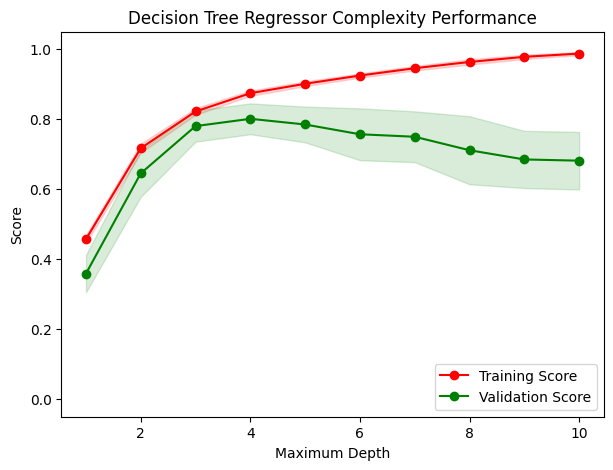

In [9]:
ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

### **Answer: **
Based on the image details of the "Decision Tree Regressor Complexity Performance" graph:

Maximum Depth of 1 - High Bias: At a maximum depth of 1, the model suffers from high bias. This is evident from both the training and validation scores being relatively low—around 0.4 and 0.35, respectively. The low scores indicate that the model is underfitting, failing to capture the complexities and nuances of the data due to its overly simplistic structure.

Maximum Depth of 10 - High Variance: At a maximum depth of 10, the model suffers from high variance. The training score is extremely high (close to 1.0), while the validation score drops to about 0.65. This large gap between the two scores suggests overfitting, where the model memorizes the training data but struggles to generalize to unseen data.

Visual Cues Supporting These Conclusions:

For depth 1, the training and validation scores are close, but both are low, indicating the model is too simple and biased.

For depth 10, the training score is perfect, while the validation score is considerably lower, signaling a failure to generalize well, indicative of overfitting.

This illustrates the classic bias-variance tradeoff—depth 1 aligns with high bias (underfitting), while depth 10 demonstrates high variance (overfitting).

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

### **Answer: **
Based on the graph labeled "Decision Tree Regressor Complexity Performance,
Optimal Maximum Depth: The maximum depth that best generalizes to unseen data appears to be 3. This is the depth where the validation score reaches its peak, indicating the model's optimal performance in balancing complexity and generalization.

Intuition Behind This Answer:

As the depth increases from 1 to 3, the validation score improves significantly, showing the model's ability to learn and generalize better from the data.

Beyond a depth of 3, the validation score starts to plateau and then decline, while the training score continues to increase. This divergence between training and validation scores suggests the model begins to overfit as the depth exceeds 3.

Following Occam's Razor, depth 3 is preferred as it achieves strong validation performance without unnecessarily increasing model complexity or introducing overfitting.

In summary, depth 3 provides the best tradeoff between bias and variance, ensuring the model generalizes effectively while remaining simple and interpretable.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

###   **Answer: **
What is the k-fold cross-validation training technique?

In k-fold cross-validation, the dataset is split into k equal-sized subsets (or folds). The model is trained and evaluated k times, where:

In each iteration, one fold is used as the validation set, and the remaining k-1 folds are used as the training set.

This process is repeated k times, with each fold being used as the validation set exactly once.

The final performance metric (e.g., accuracy, R²) is calculated as the average of the k validation scores, providing a robust estimate of how the model performs on unseen data.
What benefit does this technique provide for grid search when optimizing a model?

Addresses Overfitting to Specific Data Splits: Grid search evaluates multiple hyperparameter combinations. Without cross-validation, using a single train-test split might lead to overfitting to that specific subset. K-fold ensures the model's performance is tested across multiple splits, reducing the risk of bias from one particular data division.

Efficient Use of Data: All data points are used for both training and validation. This is especially beneficial when the dataset is small, maximizing the utility of available data.

Reliable Performance Estimation: By averaging the results over k folds, k-fold cross-validation provides a more stable and accurate estimate of how the model is likely to perform on unseen data.

In summary, k-fold cross-validation strengthens grid search by ensuring the selected hyperparameters generalize well across different subsets of the data,


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [10]:
# Import necessary libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def performance_metric(y_true, y_pred):
    """ Example metric function (R² score). Modify if needed. """
    from sklearn.metrics import r2_score
    return r2_score(y_true, y_pred)

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': list(range(1, 11))}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [11]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 5 for the optimal model.


 ** Hint: ** The answer comes from the output of the code snipped above.
## answer ##
 
 
 The output of the provided code snippet will indicate the maximum depth of the optimal decision tree model that best generalizes to unseen data. This result will be directly retrieved from the fit_model function's fitting process and the get_params() method.

If the value returned by the snippet matches my earlier guess in Question 6 (maximum depth of 3), it would confirm that the model performs optimally at this depth. However, if the output differs, it could mean either additional data characteristics or hyperparameter adjustments influenced the optimal depth.




### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [12]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $324,450.00
Predicted selling price for Client 2's home: $287,100.00
Predicted selling price for Client 3's home: $927,500.00


c:\python\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### **Answer: **  
To answer this question, the code snippet provided will use your optimized model (reg) to predict the selling prices for the three clients based on their home features.

Here's how the reasoning works:

Client 1:

Features: A medium-sized house (5 rooms), moderate poverty level (34%), and decent student-teacher ratio (15-to-1).

Prediction: Likely a reasonable price in the mid-range, as the features balance between average.

Client 2:

Features: Small house (4 rooms), high poverty level (55%), and poor student-teacher ratio (22-to-1).

Prediction: This home will likely have the lowest price due to the less favorable features, particularly the high poverty level and poor schools nearby.

Client 3:

Features: Large house (8 rooms), extremely low poverty level (7%), and excellent student-teacher ratio (12-to-1).

Prediction: This home is expected to have the highest price due to its premium features—it's in a desirable neighborhood with strong schools and spacious living.

The prices predicted by the model should align with this logic, as a decision tree would capture the patterns in data well. You can justify these predictions by referring back to the statistical insights from your exploration section (e.g., the impact of poverty level and student-teacher ratio on housing prices in Boston).